In [ ]:
### notebook for homework 6
### Raja Batra and Eli Rejto
### October 5, 2023

In [6]:
import os
import numpy as np

If you fo not already have torch in your venv do: pip install torch

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [34]:
from torch.utils.data import Dataset, DataLoader

## data preperation process

#### I created two subdirectories for training data and validation data. I used 35 pictures for the training and 15 for validation out. of the 50. So 0.7 training and 0.3 validation. I then transformed the images to 224 by 224 pixels and made them into tensors

In [143]:

#training_data = 'hw6_data/training_data'
#validation_data = 'hw6_data/validation_data'
data = 'hw6_data'


In [144]:
imgtransform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [145]:
dataset = torchvision.datasets.ImageFolder(root=data, transform=imgtransform)

##### function just to display images

In [146]:
def showImages(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    grid = torchvision.utils.make_grid(images, nrow=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print("labels: ", labels)

labels:  tensor([1, 4, 4, 0, 3, 4])


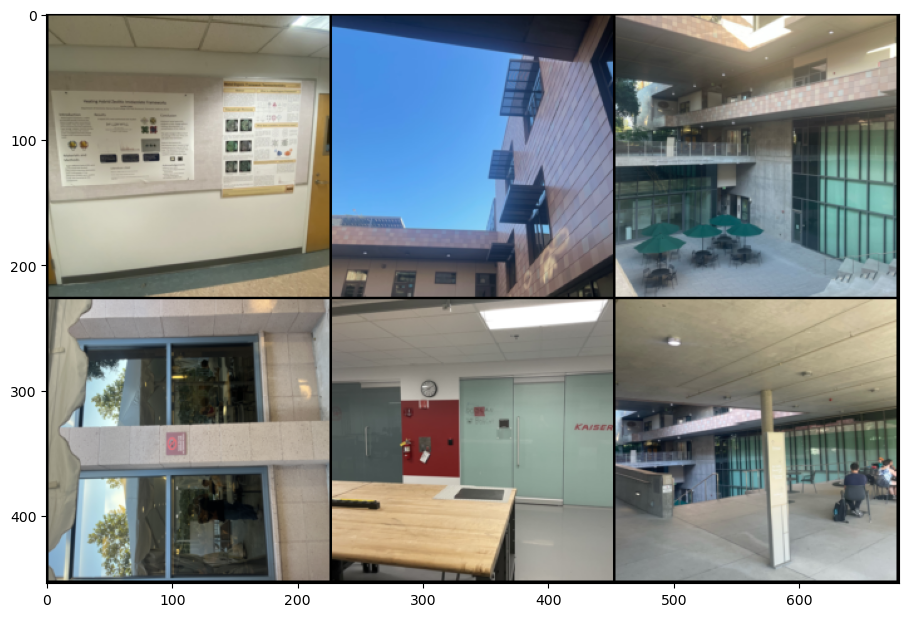

In [147]:
showImages(dataset)

In [149]:
validation_pct = 0.2
num_samples = len(dataset)
num_valid = int(validation_pct * num_samples)
num_train = num_samples - num_valid

In [151]:
train_dataset, validation_dataset = torch.utils.data.random_split(dataset, [num_train, num_valid])

In [157]:
train_data = DataLoader(train_dataset, batch_size=5, shuffle=True)
validation_data = DataLoader(validation_dataset, batch_size=5, shuffle=False)

## Nearest Neighbor Approach

In [152]:
import torchvision.models as models

In [153]:
model = models.resnet50(pretrained=True)
model = model.eval()  

In [154]:
def extract_features(model, image):
    # Preprocess the image and extract features
    with torch.no_grad():
        features = model(image.unsqueeze(0))  # Add a batch dimension
    return features.squeeze()

In [155]:
train_features = []
train_labels = []

In [158]:
##do feature extraction
for images, labels in train_data:
    for image, label in zip(images, labels):
        features = extract_features(model, image)
        train_features.append(features.numpy())
        train_labels.append(label)

In [159]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)

In [160]:
print(train_features)

[[-3.4645896   0.04831573  1.3669076  ... -2.257411    1.3765252
   4.0081487 ]
 [-2.9060402   0.46090817  0.49368006 ... -4.3661466  -1.4377075
   0.7731841 ]
 [-3.590753   -2.057806   -1.1116335  ... -4.522385   -2.222939
   4.05791   ]
 ...
 [-3.1210651  -1.4594557  -1.2626334  ... -3.0955544  -1.2383138
   4.439238  ]
 [-3.177009   -0.57316554  0.8163789  ... -3.9772363  -0.16247125
   1.0309386 ]
 [-3.7658615  -1.2934569  -0.03721425 ... -2.8572292   0.7456256
   1.4934098 ]]


In [161]:
print(train_labels)

[2 2 0 1 4 0 2 3 0 1 1 2 1 2 1 0 1 2 0 0 3 2 4 1 1 2 4 1 0 2 1 1 4 4 0 0 2
 3 0 3 4 2 4 4 4 4 2 2 4 1 1 2 1 0 1 2 4 1 3 1 3 4 2 2 1 1 3 0 1 4 3 0 1 4
 3 4 1 3 2 2 3 4 4 0 1 4 1 2 1 2 0 4 3 2 3 1 3 0 4 2 4 0 1 2 2 2 4 3 3 3 1
 4 4 0 0 3 3 3 3 0 1 0 3 4 2 3 4 3 2 2 1 3 4 0 3 2 1 4 4 4 1 3 0 4 2 0 2 0
 1 4 0 0 1 4 4 3 0 0 0 0 2 0 2 1 4 1 4 0 3 2 2 1 3 4 3 2 0 0 3 1 2 1 3 4 3
 3 0 3 4 2 0 1 4 0 2 3 1 1 0 4]
